In [42]:
pip install --upgrade pandas seaborn 

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 31.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 2.5 MB/s eta 0:00:00ta 0:00:01
  Attempting uninstall: pandas
    Found existing installation: pandas 2.1.3
    Uninstalling pandas-2.1.3:
      Successfully uninstalled pandas-2.1.3
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.11.2
    Uninstalling seaborn-0.11.2:
      Successfully uninstalled seaborn-0.11.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
panel 0.13.1 requires bokeh<2.5.0,>=2.4.0, but you have bokeh 3.3.2 which is incompatible.
sagemaker 2.199.0 requires urllib3<1.27, but you have urllib3 2.1.0 which is incompatible.
sagemaker-datawrangler 0.4.3 requires sagemaker-data-insights==0.4.0, but you have sagemaker-data-insights 0.3.3 which is incompatible.

[notice] A new 

In [6]:
pip install --upgrade openpyxl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.0/250.0 kB 1.9 MB/s eta 0:00:00:00:01
  Attempting uninstall: openpyxl
    Found existing installation: openpyxl 3.0.10
    Uninstalling openpyxl-3.0.10:
      Successfully uninstalled openpyxl-3.0.10

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

/opt/conda/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/opt/conda/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## Read Data

In [3]:
!aws s3 cp s3://team6datasets/Online\ Retail.xlsx ./rawdatasets/

download: s3://team6datasets/Online Retail.xlsx to rawdatasets/Online Retail.xlsx


In [4]:
# Path to the downloaded Excel file
file_path = 'rawdatasets/Online Retail.xlsx'

# Read the Excel file into a pandas DataFrame
df = pd.read_excel(file_path, engine='openpyxl')

# Display the first few rows of the DataFrame
print(df.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  


## Explore Data

In [5]:
df.info

<bound method DataFrame.info of        InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  Cust

In [6]:
df.shape

(541909, 8)

In [7]:
# check for missing values entire doc
missing_values = df.isnull().sum()
missing_values

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [8]:
# check missing values for Description
rows_with_missing_desc = df.loc[df['Description'].isnull()]

# Display results
print(rows_with_missing_desc)

       InvoiceNo StockCode Description  Quantity         InvoiceDate  \
622       536414     22139         NaN        56 2010-12-01 11:52:00   
1970      536545     21134         NaN         1 2010-12-01 14:32:00   
1971      536546     22145         NaN         1 2010-12-01 14:33:00   
1972      536547     37509         NaN         1 2010-12-01 14:33:00   
1987      536549    85226A         NaN         1 2010-12-01 14:34:00   
...          ...       ...         ...       ...                 ...   
535322    581199     84581         NaN        -2 2011-12-07 18:26:00   
535326    581203     23406         NaN        15 2011-12-07 18:31:00   
535332    581209     21620         NaN         6 2011-12-07 18:35:00   
536981    581234     72817         NaN        27 2011-12-08 10:33:00   
538554    581408     85175         NaN        20 2011-12-08 14:06:00   

        UnitPrice  CustomerID         Country  
622           0.0         NaN  United Kingdom  
1970          0.0         NaN  United K

In [9]:
# check missing values for CustomerID
rows_with_missing_custID = df.loc[df['CustomerID'].isnull()]

# Display results
print(rows_with_missing_custID)

       InvoiceNo StockCode                      Description  Quantity  \
622       536414     22139                              NaN        56   
1443      536544     21773  DECORATIVE ROSE BATHROOM BOTTLE         1   
1444      536544     21774  DECORATIVE CATS BATHROOM BOTTLE         2   
1445      536544     21786               POLKADOT RAIN HAT          4   
1446      536544     21787            RAIN PONCHO RETROSPOT         2   
...          ...       ...                              ...       ...   
541536    581498    85099B          JUMBO BAG RED RETROSPOT         5   
541537    581498    85099C   JUMBO  BAG BAROQUE BLACK WHITE         4   
541538    581498     85150    LADIES & GENTLEMEN METAL SIGN         1   
541539    581498     85174                S/4 CACTI CANDLES         1   
541540    581498       DOT                   DOTCOM POSTAGE         1   

               InvoiceDate  UnitPrice  CustomerID         Country  
622    2010-12-01 11:52:00       0.00         NaN  Unit

In [10]:
# new dataframe with non-nulls
df_noblank = df.dropna()

# Verify the operation by checking the first few rows of the new DataFrame
missing_values_noblank = df_noblank.isnull().sum()
missing_values_noblank

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [11]:
# Display summary statistics for all numerical columns
summary_statistics = df_noblank.describe()
print(summary_statistics)

            Quantity                    InvoiceDate      UnitPrice  \
count  406829.000000                         406829  406829.000000   
mean       12.061303  2011-07-10 16:30:57.879207424       3.460471   
min    -80995.000000            2010-12-01 08:26:00       0.000000   
25%         2.000000            2011-04-06 15:02:00       1.250000   
50%         5.000000            2011-07-31 11:48:00       1.950000   
75%        12.000000            2011-10-20 13:06:00       3.750000   
max     80995.000000            2011-12-09 12:50:00   38970.000000   
std       248.693370                            NaN      69.315162   

          CustomerID  
count  406829.000000  
mean    15287.690570  
min     12346.000000  
25%     13953.000000  
50%     15152.000000  
75%     16791.000000  
max     18287.000000  
std      1713.600303  


## Visuals

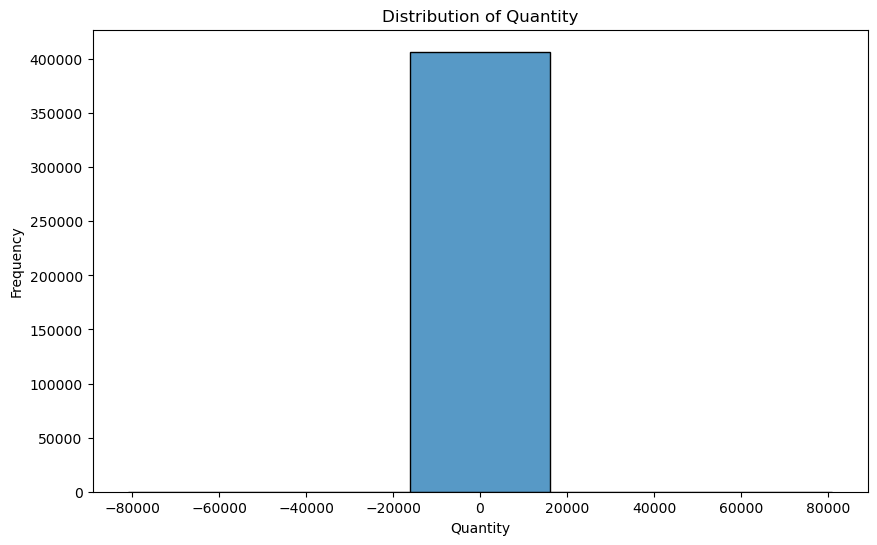

In [34]:
# Plotting histogram for the 'Quantity' column
plt.figure(figsize=(10, 6))
sns.histplot(df_noblank['Quantity'], bins=5, kde=False)
plt.title('Distribution of Quantity')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()

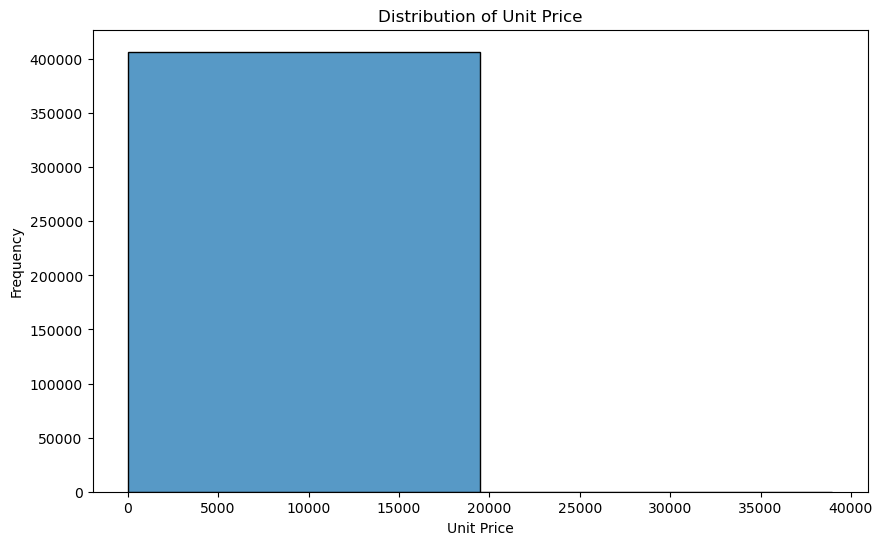

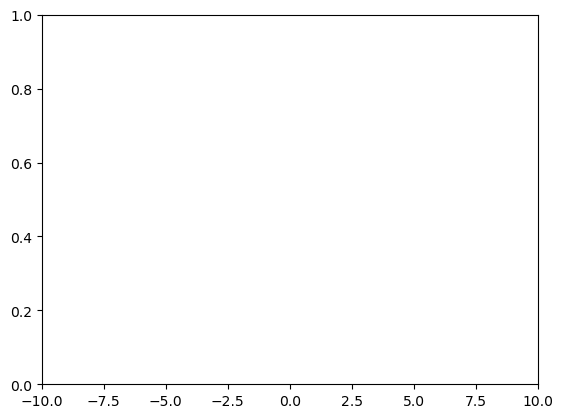

In [36]:
# Plotting histogram for the 'UnitPrice' column
plt.figure(figsize=(10, 6))
sns.histplot(df_noblank['UnitPrice'], bins=2, kde=False)
plt.title('Distribution of Unit Price')
plt.xlabel('Unit Price')
plt.ylabel('Frequency')
plt.show()

# Adjust values
plt.xlim(-10, 10)
plt.show()

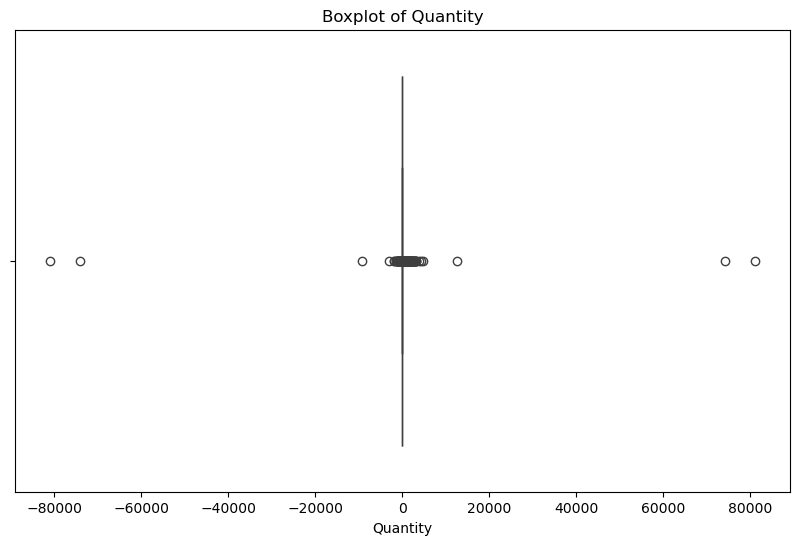

In [19]:
# Boxplot for the 'Quantity' column
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_noblank['Quantity'])
plt.title('Boxplot of Quantity')
plt.show()

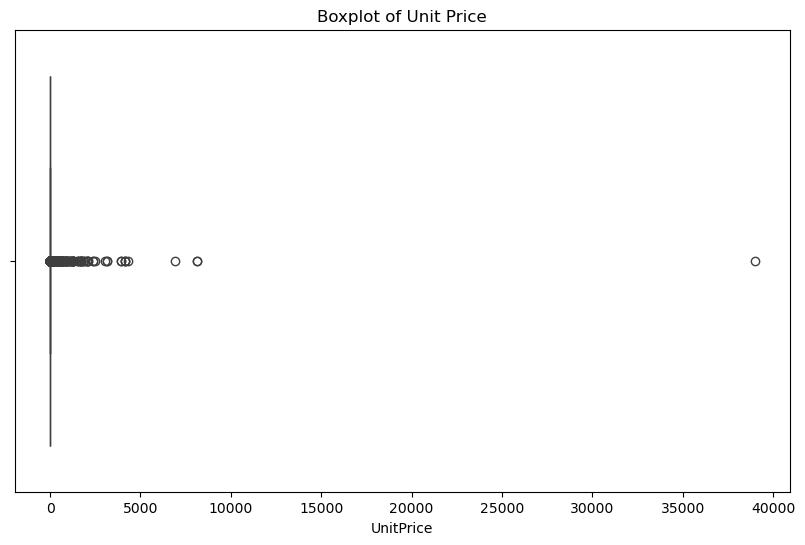

In [22]:
# Boxplot for the 'UnitPrice' column
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_noblank['UnitPrice'])
plt.title('Boxplot of Unit Price')
plt.show()

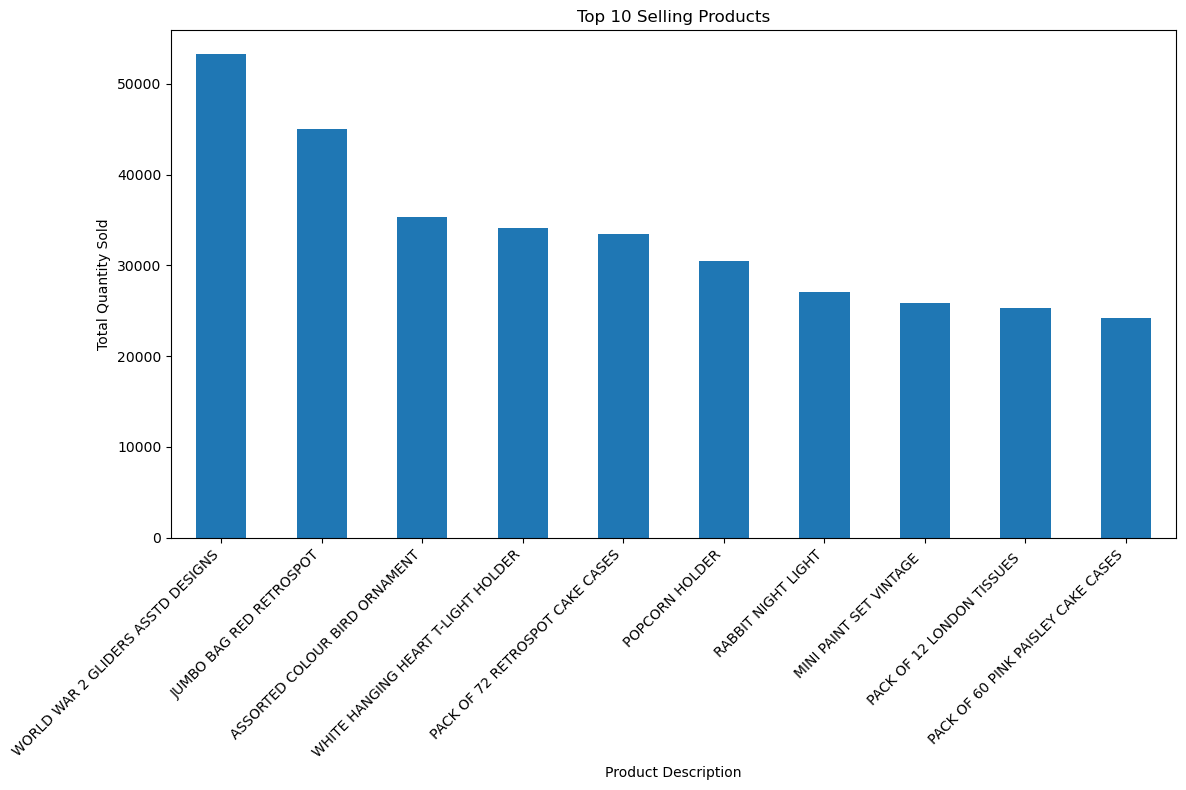

In [23]:
# Grouping the data by 'Description' and summing up the 'Quantity'
top_products = df_noblank.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

# Plotting the top selling products
plt.figure(figsize=(12, 8))
top_products.plot(kind='bar')
plt.title('Top 10 Selling Products')
plt.ylabel('Total Quantity Sold')
plt.xlabel('Product Description')
plt.xticks(rotation=45, ha='right')  # Rotate labels to avoid overlap
plt.tight_layout()  # Adjust layout to not cut off labels
plt.show()

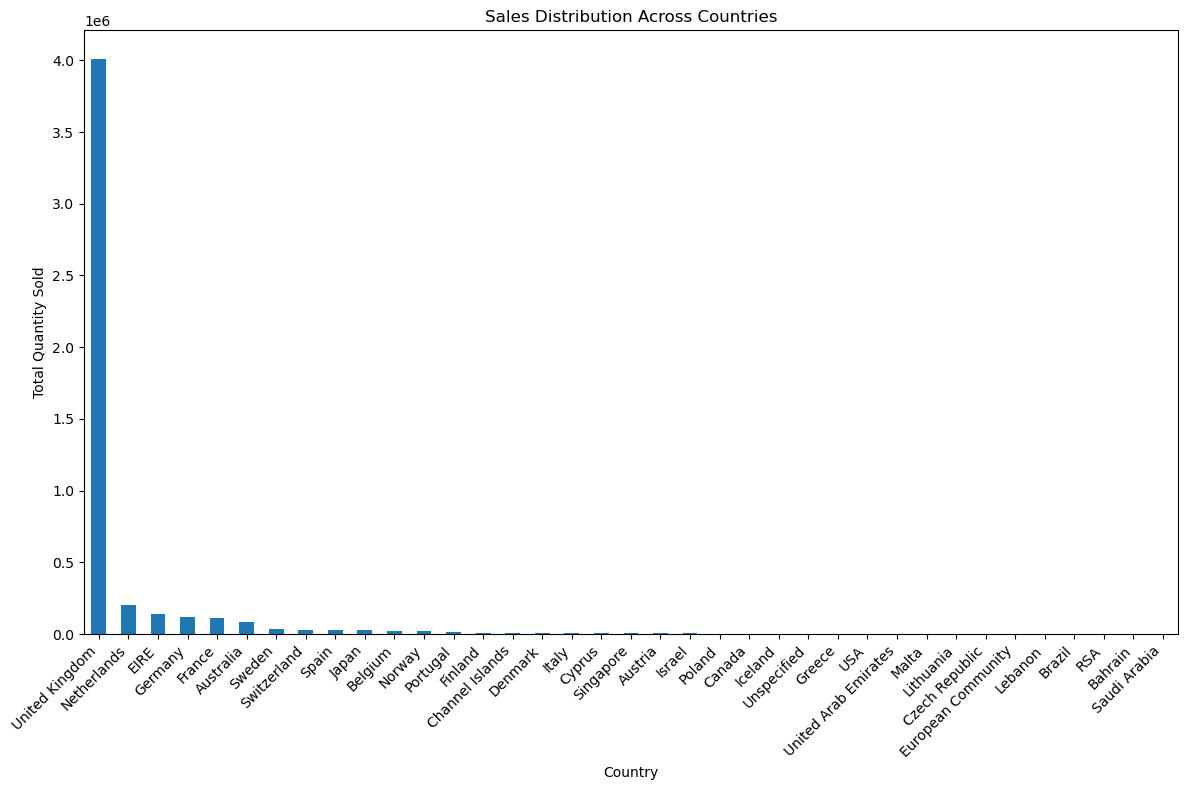

In [24]:
# Grouping the data by 'Country' and summing up the 'Quantity'
sales_by_country = df_noblank.groupby('Country')['Quantity'].sum().sort_values(ascending=False)

# Plotting the sales distribution across countries
plt.figure(figsize=(12, 8))
sales_by_country.plot(kind='bar')
plt.title('Sales Distribution Across Countries')
plt.ylabel('Total Quantity Sold')
plt.xlabel('Country')
plt.xticks(rotation=45, ha='right')  # Rotate labels to avoid overlap
plt.tight_layout()  # Adjust layout to not cut off labels
plt.show()

/tmp/ipykernel_364/2030069491.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_noblank['TotalPrice'] = df_noblank['Quantity'] * df_noblank['UnitPrice']


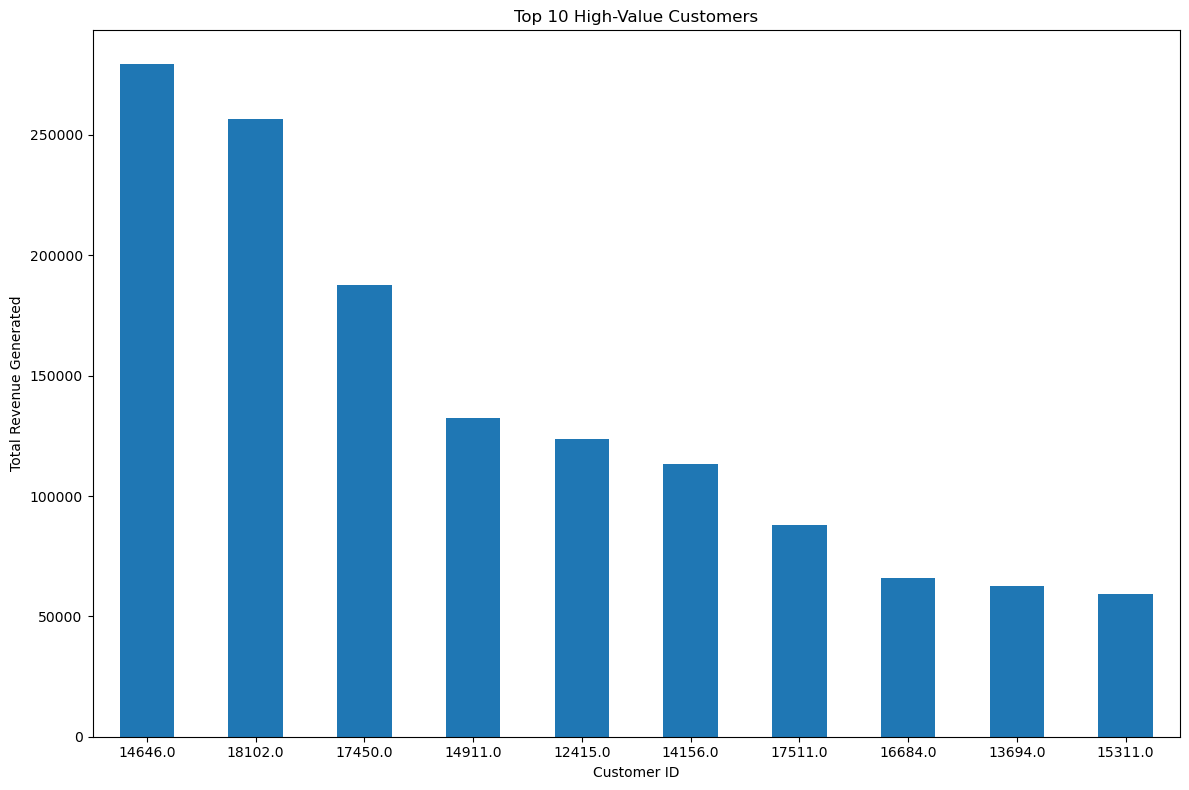

In [25]:
# Calculate the total price for each row
df_noblank['TotalPrice'] = df_noblank['Quantity'] * df_noblank['UnitPrice']

# Group by CustomerID to find the total spent by each customer
customer_value = df_noblank.groupby('CustomerID')['TotalPrice'].sum().sort_values(ascending=False).head(10)

# Plotting the top 10 high-value customers
plt.figure(figsize=(12, 8))
customer_value.plot(kind='bar')
plt.title('Top 10 High-Value Customers')
plt.ylabel('Total Revenue Generated')
plt.xlabel('Customer ID')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

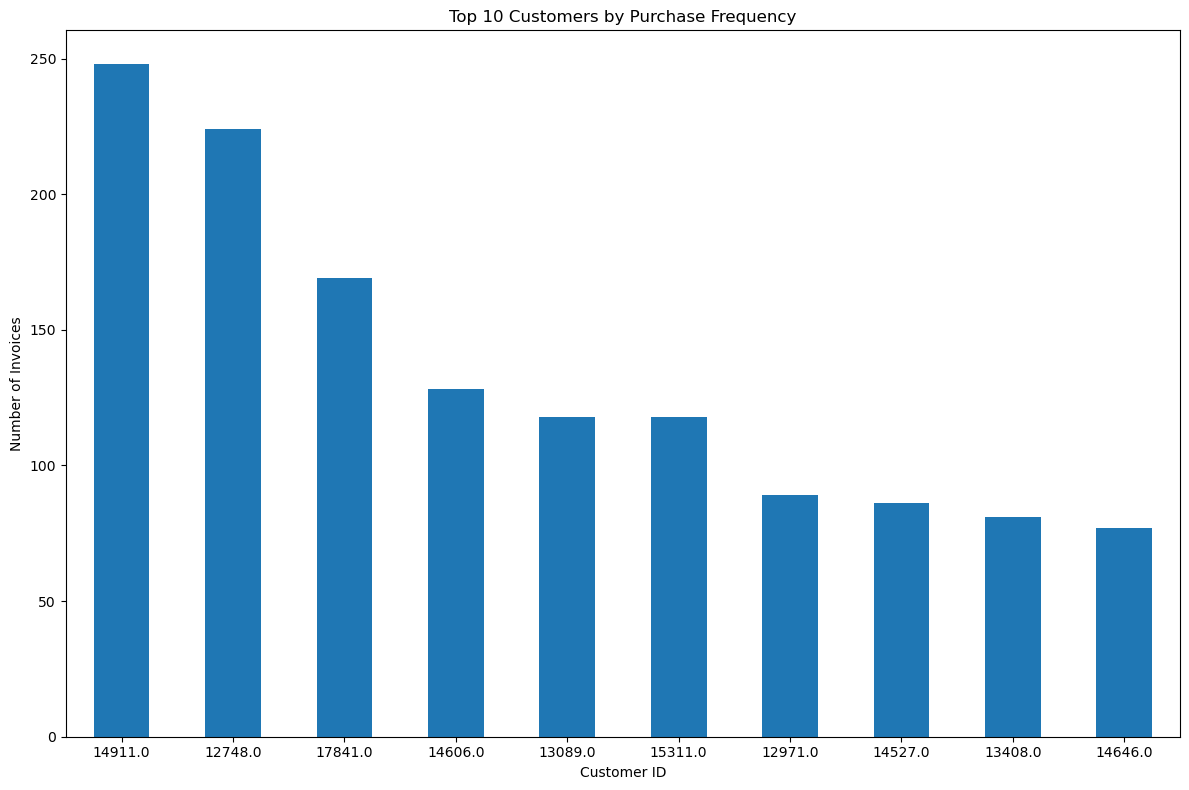

In [26]:
# Count the unique number of invoices for each customer
purchase_frequency = df_noblank.groupby('CustomerID')['InvoiceNo'].nunique().sort_values(ascending=False).head(10)

# Plotting the purchase frequency of the top 10 customers
plt.figure(figsize=(12, 8))
purchase_frequency.plot(kind='bar')
plt.title('Top 10 Customers by Purchase Frequency')
plt.ylabel('Number of Invoices')
plt.xlabel('Customer ID')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [27]:
# Count the unique invoices for each customer
purchase_frequency_per_customer = df_noblank.groupby('CustomerID')['InvoiceNo'].nunique()

# Calculate the average purchase frequency across all customers
average_purchase_frequency = purchase_frequency_per_customer.mean()

print(f"The average purchase frequency across all customers is: {average_purchase_frequency:.2f}")

The average purchase frequency across all customers is: 5.08


In [29]:
# Create a copy of the DataFrame to avoid SettingWithCopyWarning
df_noblank_copy = df_noblank.copy()

# Ensure InvoiceDate is in datetime format
df_noblank_copy['InvoiceDate'] = pd.to_datetime(df_noblank_copy['InvoiceDate'])

# Sort the DataFrame by CustomerID and InvoiceDate
df_sorted = df_noblank_copy.sort_values(by=['CustomerID', 'InvoiceDate'])

# Calculate the difference in days for each customer's consecutive purchases
df_sorted['PreviousInvoiceDate'] = df_sorted.groupby('CustomerID')['InvoiceDate'].shift(1)
df_sorted['DayDifference'] = (df_sorted['InvoiceDate'] - df_sorted['PreviousInvoiceDate']).dt.days

# Exclude the first purchase of each customer since it does not have a preceding purchase
df_differences = df_sorted.dropna(subset=['DayDifference'])

# Calculate the average purchase interval for each customer
avg_interval_per_customer = df_differences.groupby('CustomerID')['DayDifference'].mean()

# Calculate the overall average across all customers
overall_avg_interval = avg_interval_per_customer.mean()

print(f"The average intermission in days between purchases for all customers is: {overall_avg_interval:.2f} days")

The average intermission in days between purchases for all customers is: 3.40 days
